In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [100]:
mp=pd.read_csv('spam1.csv')
mp.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1141,spam,I don't know u and u don't know me. Send CHAT ...,NaN,NaN,NaN
898,ham,"Thursday night? Yeah, sure thing, we'll work i...",NaN,NaN,NaN
35,ham,Yup... Ok i go home look at the timings then i...,NaN,NaN,NaN
932,ham,So do you have samus shoulders yet,NaN,NaN,NaN
4752,spam,Cashbin.co.uk (Get lots of cash this weekend!)...,NaN,NaN,NaN


In [101]:
mp.shape

(5572, 5)

In [102]:
# steps we follow in completing the project are:
# 1) data cleaning (because in this data set we have much nan values are present)
# 2) EDA (exploratory data analysis)
# 3) text prepocessing 
# 4) model buliding 
# 5) evaluation 
# 6) improvement 
# 7) forming website and deploy on website 


In [103]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [104]:
mp.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2020,ham,Anything lor but toa payoh got place 2 walk me...,NaN,NaN,NaN
205,ham,ÌÏ say until like dat i dun buy ericsson oso c...,NaN,NaN,NaN
156,ham,I'm leaving my house now...,NaN,NaN,NaN
4909,ham,WE REGRET TO INFORM U THAT THE NHS HAS MADE A ...,NaN,NaN,NaN
2531,ham,What's happening with you. Have you gotten a j...,NaN,NaN,NaN


In [105]:
mp.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True) #this permanent function so we do inplace =true
#we use inplace =true isto avoid creating a new DataFrame object with each successive modification but instead making changes to the original DataFrame itself

In [106]:
mp.rename(columns={'v1':'target','v2':'message'},inplace=True)
#mp.rename(columns={'label':'target','message':'message'},inplace=True)

In [107]:
mp.sample(5)

,target,message
5025,spam,Ur cash-balance is currently 500 pounds - to m...
5146,ham,Oh unintentionally not bad timing. Great. Fing...
5063,ham,I dunno lei... Like dun haf...
2030,ham,"Ugh y can't u just apologize, admit u were wro..."
2508,ham,Ok...


In [18]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

In [19]:
encoder.fit_transform(mp['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [20]:
mp['target']=encoder.fit_transform(mp['target'])

In [21]:
mp.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
#checking how many missing values are present in this dataset 
mp.isnull().sum()


target     0
message    0
dtype: int64

In [23]:
#cheaking for duplicate values
mp.duplicated().sum()


403

In [24]:
#after removing duplicates
mp=mp.drop_duplicates(keep='first')
#checking after removing how many duplicate values are present 
mp.duplicated().sum()

0

In [25]:
#after removing duplicate values about remaining dataset 
mp.shape

(5169, 2)

In [26]:
mp.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
#here our cleaning part is completed now our task is to do eda
mp['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

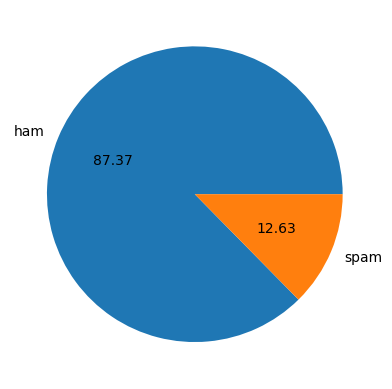

In [28]:
import matplotlib.pyplot as plt 
plt.pie(mp['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
#here we use autopcts of watch value after two decimal 
plt.show()

In [29]:
# from here we see that our data imbalanced

In [30]:
import nltk # nltk full (natural language tool kit )
nltk.download('punkt')
#this line ran by us because some depandencies are required for the runing of nltk command


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
# so, we are going make three new columns 1>no. of character in sms
# 2> no. of words in sms 3>no.of sentences in the sms 

mp['num_charaters']=mp['message'].apply(len)
# here we created a new in the column in dataset which can show number of character present in the message 

In [32]:
mp.head()

,target,message,num_charaters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [33]:
#number of words
mp['message'].apply(lambda x:(nltk.word_tokenize(x)))
#by this line we break all words in sms

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [34]:
mp['num_words']=mp['message'].apply(lambda x:len(nltk.word_tokenize(x)))
#num of words

In [35]:
mp.head()

,target,message,num_charaters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [36]:
mp['message'].apply(lambda x:(nltk.sent_tokenize(x)))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: message, Length: 5169, dtype: object

In [37]:
mp['num_sentence']=mp['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [38]:
mp.head()

,target,message,num_charaters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [39]:
mp[['num_charaters','num_words','num_sentence']].describe()

,num_charaters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [40]:
#here we analyze ham and spam differently 

In [41]:
mp[mp['target']==0][['num_charaters','num_words','num_sentence']].describe()

,num_charaters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [42]:
mp[mp['target']==1][['num_charaters','num_words','num_sentence']].describe()

,num_charaters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [43]:
import seaborn as sns

<Axes: xlabel='num_charaters', ylabel='Count'>

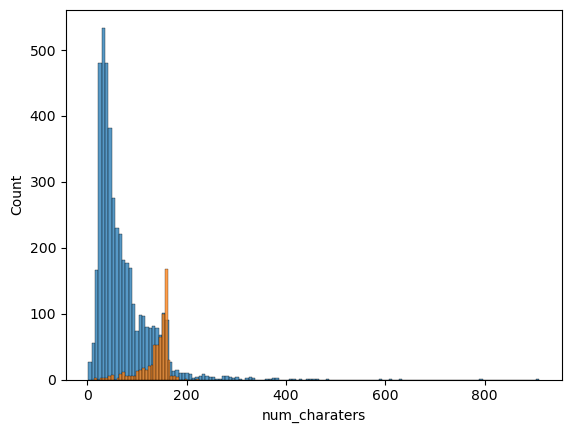

In [45]:
sns.histplot(mp[mp['target']==0]['num_charaters'])
sns.histplot(mp[mp['target']==1]['num_charaters'])

<Axes: xlabel='num_words', ylabel='Count'>

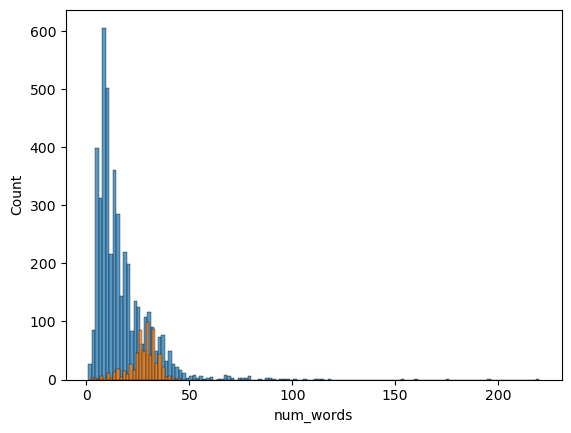

In [46]:
sns.histplot(mp[mp['target']==0]['num_words'])
sns.histplot(mp[mp['target']==1]['num_words'])

In [47]:
#from here we say that ham messages have less characters where as spam contains more characters .

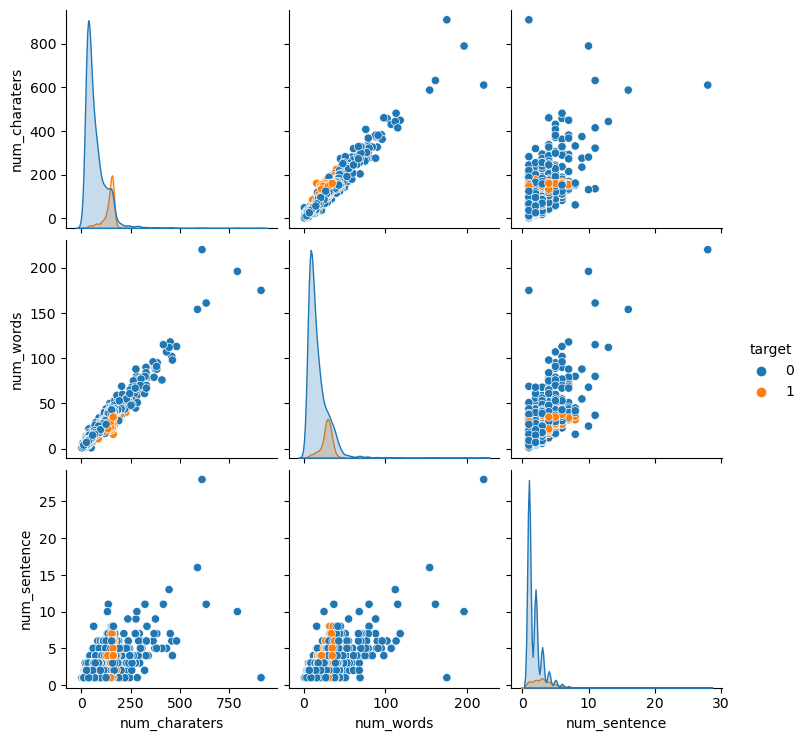

In [48]:
sns.pairplot(mp,hue='target')

C:\Users\Welcome\AppData\Local\Temp\ipykernel_20328\4139448632.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mp.corr(),annot=True)


<Axes: >

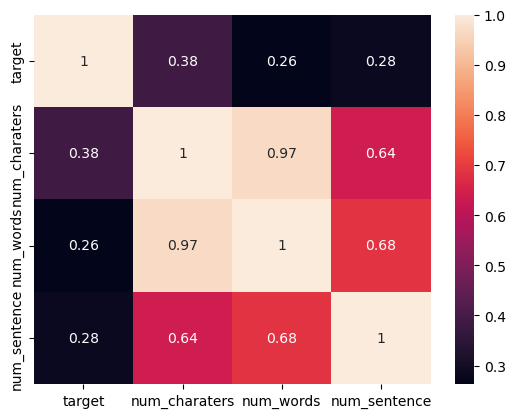

In [49]:
sns.heatmap(mp.corr(),annot=True)

In [50]:
#here we are going to take only column in these 3 columns because there very strong correlation in these so, we take num_character column

In [51]:
#here we are going to do 1)lower case all the character 2) tokenization
#3) remoivng special characters 4)removing stop words and punctuation 5)stemming

In [52]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
import string
string.punctuation
from nltk.corpus import stopwords

In [54]:
from nltk.stem.porter import PorterStemmer
#it take words to root words
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [55]:
def transform_text(message):
    
    #1) converting capital letter to small letter
    message=message.lower()
    #2) tokenizaztion 
    message=nltk.word_tokenize(message)
     
    y=[]
    for i in message:
        if i.isalnum():
            y.append(i)
    message=y[:] #cloning the list y
    y.clear()
    for i in message :
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text =y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return "  ".join(y)

In [56]:
transform_text('did you like my ML presentation ?')
#examples 
#stopwords change the character into its original form (root word) like here it changed the presentation to present

'like  ml  present'

In [57]:
 transform_text(mp['message'][0])
#examples

'go  jurong  point  crazi  avail  bugi  n  great  world  la  e  buffet  cine  got  amor  wat'

In [58]:
mp['transformed_message']=mp['message'].apply(transform_text)

In [59]:
mp.head()

,target,message,num_charaters,num_words,num_sentence,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [60]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [61]:
spam_wc=wc.generate(mp[mp['target']==1]['transformed_message'].str.cat(sep=" "))

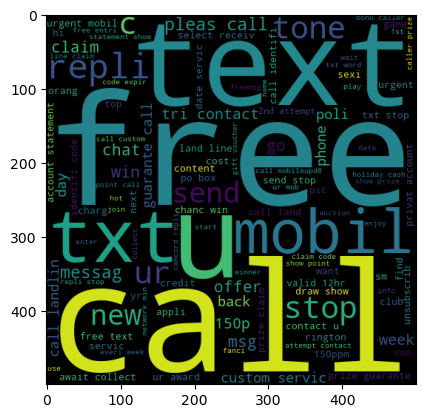

In [62]:
plt.imshow(spam_wc)

In [63]:
ham_wc=wc.generate(mp[mp['target']==0]['transformed_message'].str.cat(sep=" "))

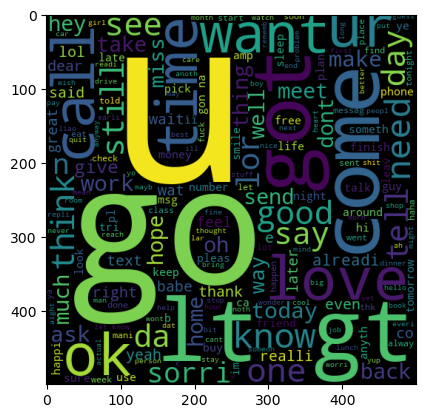

In [64]:
plt.imshow(spam_wc)


In [65]:
#model building 

In [66]:
mp.head()


,target,message,num_charaters,num_words,num_sentence,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [67]:
# our input is transformed_message and output is target

In [68]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [69]:
X=tfidf.fit_transform(mp['transformed_message']).toarray()
#toarray because it gives sparse matrix

In [70]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
X.shape

(5169, 6708)

In [72]:
#here we see that there are remaining 6708 words 

In [73]:
y=mp['target'].values

In [74]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [76]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [77]:
#here we crating object of these
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [78]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[1205  155]
 [  37  154]]
0.49838187702265374


In [79]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9555125725338491
[[1360    0]
 [  69  122]]
1.0


In [80]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9696969696969697
[[1356    4]
 [  43  148]]
0.9736842105263158


In [81]:
#comparing all model with naive_base
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [82]:
svc=SVC()
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
lrc=LogisticRegression()

In [83]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'LB': lrc,
    'DT': dtc
}

In [84]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    confusion_matrix(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [85]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For",name)
    print("Accuracy",current_accuracy)
    print("precision",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy 0.9696969696969697
precision 0.9864864864864865
For KN
Accuracy 0.903932946486138
precision 1.0
For NB
Accuracy 0.9555125725338491
precision 1.0
For LB
Accuracy 0.941972920696325
precision 0.963302752293578
For DT
Accuracy 0.9548678272082527
precision 0.827027027027027


In [86]:
performance_df=pd.DataFrame({'ALgorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [87]:
performance_df

,ALgorithm,Accuracy,Precision
0,SVC,0.969697,0.986486
1,KN,0.903933,1.000000
2,NB,0.955513,1.000000
3,LB,0.941973,0.963303
4,DT,0.954868,0.827027


In [88]:
#So from here we see that our best model is svm by accuracy and precision wise

In [89]:
performance_df1=pd.melt(performance_df, id_vars="ALgorithm")

In [90]:
performance_df1

,ALgorithm,variable,value
0,SVC,Accuracy,0.969697
1,KN,Accuracy,0.903933
2,NB,Accuracy,0.955513
3,LB,Accuracy,0.941973
4,DT,Accuracy,0.954868
5,SVC,Precision,0.986486
6,KN,Precision,1.000000
7,NB,Precision,1.000000
8,LB,Precision,0.963303
9,DT,Precision,0.827027


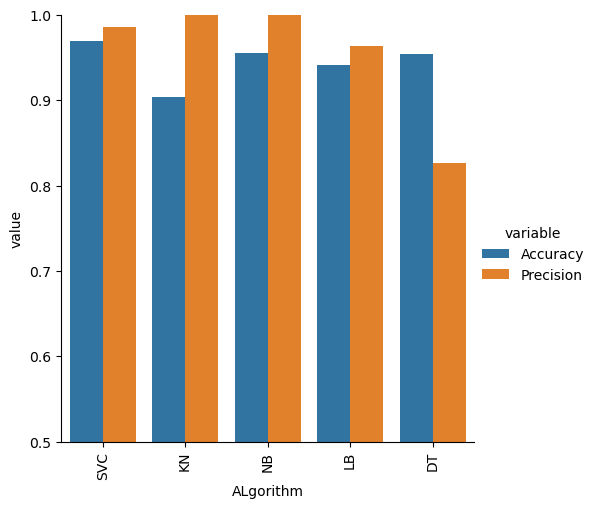

In [91]:
sns.catplot(x='ALgorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5 )
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [92]:
#here we see that the best performing model is MNB .

In [93]:
#after doing model our target is do pipelineing 
#1)our task is do preprocessing 
#2)vectorizeation
#3) application of algorithms

In [94]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb ,open('model.pkl','wb'))